In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam


In [2]:
wine_red = pd.read_csv(r'C:\Users\Owner\Desktop\Wine_Quality\winequality-red.csv',delimiter=';')
wine_white = pd.read_csv(r'C:\Users\Owner\Desktop\Wine_Quality\winequality-white.csv',delimiter=';')

#Separate data from labels a make red and white wines into training and testing sets
red_data = wine_red.iloc[:,0:11]
red_labels = wine_red.iloc[:,11]

white_data = wine_white.iloc[:,0:11]
white_labels = wine_white.iloc[:,11]

red_train_data, red_test_data, red_train_labels, red_test_labels = (train_test_split
                                            (red_data, red_labels, test_size=0.25, random_state=500))

white_train_data, white_test_data, white_train_labels, white_test_labels = (train_test_split
                                            (white_data, white_labels, test_size=0.25, random_state=500))

#We now have both training and validation sets for both wine type which contain all 11 attributes
#Lets also perfrom Standard Scaling to each train and test set to later use
scaler = StandardScaler()
scaler.fit(red_train_data)
scaler.fit(red_test_data)
scaler.fit(white_train_data)
scaler.fit(white_test_data)
ss_red_train_data = scaler.transform(red_train_data)
ss_red_test_data = scaler.transform(red_test_data)
ss_white_train_data = scaler.transform(white_train_data)
ss_white_test_data = scaler.transform(white_test_data)

ss_red_train_data = pd.DataFrame(ss_red_train_data)
ss_red_test_data = pd.DataFrame(ss_red_test_data)
ss_white_train_data = pd.DataFrame(ss_white_train_data)
ss_white_test_data = pd.DataFrame(ss_white_test_data)



In [3]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


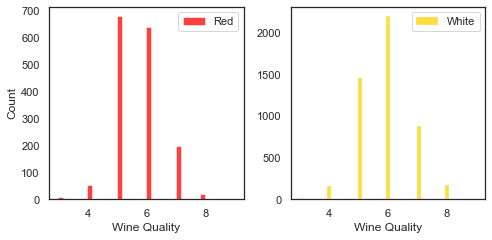

In [763]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(7,3.5))
sns.histplot( data=wine_red, x='quality',color='red', label='Red' , ax=axes[0])
sns.histplot( data=wine_white, x='quality',color='#FFD100', label='White' , ax=axes[1])
# fig.suptitle('Distribution of Wine Quality for Red & White Wines')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('Wine Quality')
axes[1].set_xlabel('Wine Quality')
axes[1].set_ylabel('')
sns.set_style("white")
plt.tight_layout()
# plt.subplots_adjust(left=0.0,
#                     right=1.01,)
fig.show()
plt.savefig('quality_distribution.pdf')

In [6]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


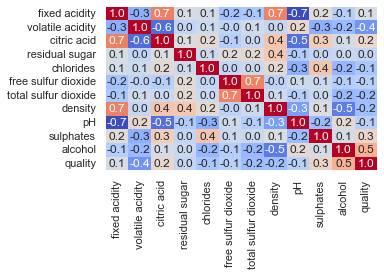

In [755]:
#Lets check the correlation between all of the variables for both wines
fig, ax = plt.subplots()
sns.heatmap(wine_red.corr(), annot=True, fmt='.1f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.gcf().set_size_inches(5.5, 4)
plt.tight_layout()
# plt.title("Correlation of Red Wine Attributes",fontsize=20)
plt.savefig('red_corr.pdf', bbox_inches='tight', pad_inches=0.0)



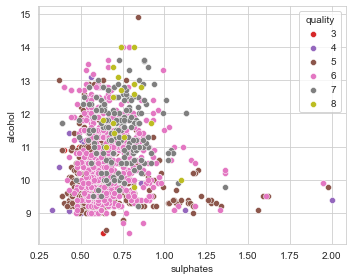

In [12]:
sns.set_style("whitegrid")
pal = sns.color_palette(palette=None,n_colors=11)
for i in range(11):
    sns.scatterplot(wine_red[wine_red['quality'] == i]['sulphates'],wine_red[wine_red['quality'] == i]['alcohol'], color=pal[i], label=i)
    
fig = plt.gcf()
fig.set_size_inches(5.0, 4)
plt.tight_layout()
plt.legend(title='quality')

plt.savefig('red_alc_x_sul.pdf')

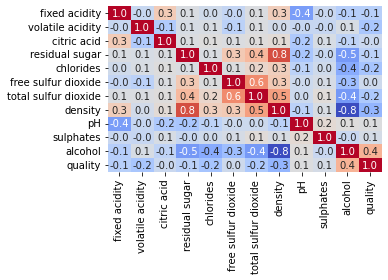

In [7]:
#Lets check the correlation between all of the variables for both wines
fig, ax = plt.subplots()
sns.heatmap(wine_white.corr(), annot=True, fmt='.1f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.gcf().set_size_inches(5.5, 4)
plt.tight_layout()
# plt.title("Correlation of Red Wine Attributes",fontsize=20)
plt.savefig('white_corr.pdf', bbox_inches='tight', pad_inches=0.0)

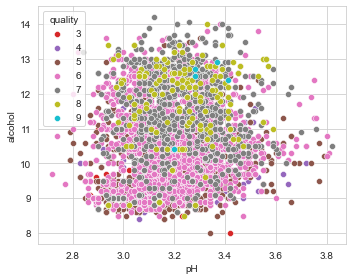

In [15]:
sns.set_style("whitegrid")

pal = sns.color_palette(palette=None,n_colors=11)
for i in range(11):
    sns.scatterplot(wine_white[wine_white['quality'] == i]['pH'],wine_white[wine_white['quality'] == i]['alcohol'], color=pal[i], label=i)
fig = plt.gcf()
fig.set_size_inches(5.0, 4)
# plt.show()
# plt.set_style("white")
plt.legend(title='quality')
plt.tight_layout()
plt.savefig('white_alc_x_ph.pdf')

In [674]:
#Lets also do a chi^2 test to see the best features for quality for red wine
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(red_train_data,red_train_labels)
d = {'Attributes': red_train_data.columns, 'Score': fit.scores_}
df = pd.DataFrame(data=d)
print(df.nlargest(11,'Score'))


              Attributes        Score
6   total sulfur dioxide  2300.861371
5    free sulfur dioxide   148.440415
10               alcohol    33.879273
1       volatile acidity    11.826585
2            citric acid    10.884704
0          fixed acidity     9.031709
3         residual sugar     7.370747
9              sulphates     3.101702
4              chlorides     0.568938
8                     pH     0.143416
7                density     0.000176


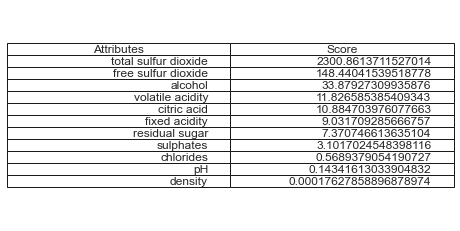

In [680]:
fig, ax =plt.subplots(figsize=(8,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.nlargest(11,'Score').values,colLabels=df.columns,loc='center')

In [681]:
#Same for white wine
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(white_train_data,white_train_labels)
d = {'Attributes': white_train_data.columns, 'Score': fit.scores_}
df = pd.DataFrame(data=d)
print(df.nlargest(11,'Score'))

              Attributes        Score
6   total sulfur dioxide  2842.541543
5    free sulfur dioxide   901.448980
3         residual sugar   333.895992
10               alcohol   115.865270
1       volatile acidity     8.811789
0          fixed acidity     6.865771
4              chlorides     1.771748
2            citric acid     0.501194
9              sulphates     0.339930
8                     pH     0.292372
7                density     0.003755


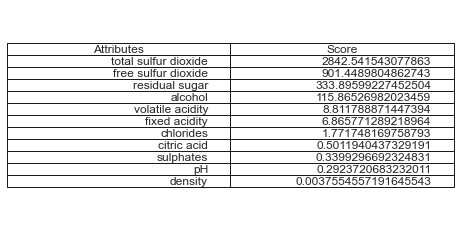

In [682]:
fig, ax =plt.subplots(figsize=(8,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.nlargest(11,'Score').values,colLabels=df.columns,loc='center')

In [14]:
#Before diving into feature selection I want to get a baseline for how all 11 attributes perfrom on a simple KNN classifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(red_train_data, red_train_labels)
scoreR = neigh.score(red_test_data, red_test_labels)
neigh.fit(white_train_data, white_train_labels)
scoreW = neigh.score(white_test_data, white_test_labels)
print("Red Accuracy:",scoreR)
print("White Accuracy:",scoreW)
#So a KNN Calsifier with 1 neighbor and all 11 features performs relitevly poorly this could be that KNN is a bad choice or that
#having all 11 features is hurting performance.

pred = neigh.predict(red_test_data)
frame = pd.DataFrame()
frame['predicted'] = pred
frame['actuals'] = list(red_test_labels)
frame['correct'] = np.where( frame['predicted'] == frame['actuals'] , '1', '0')
print(frame.iloc[:20,:])

#Through looking at the predicted and actuals it seems like the model will predict 6 when the actual is 5 which I can
#forsee being a problem. Looking at the graph of alcohol x citric acid the separation of 5 and 6 was undistinguishable 
#this means going forward I expect that models will have a tough time guessing 5s and 6s correct.

Red Accuracy: 0.595
White Accuracy: 0.5436734693877551
    predicted  actuals correct
0           7        6       0
1           5        5       1
2           5        5       1
3           7        5       0
4           7        5       0
5           6        5       0
6           6        5       0
7           6        6       1
8           4        6       0
9           3        5       0
10          6        5       0
11          4        4       1
12          4        5       0
13          5        5       1
14          5        5       1
15          6        6       1
16          5        7       0
17          6        5       0
18          5        6       0
19          5        7       0


In [684]:
#Lets do some feature selection using sklearn and test KNN again using the 4 top features
print(red_train_data.shape)
red_train_data_new = SelectKBest(chi2, k=4).fit_transform(red_train_data, red_train_labels)
red_test_data_new = SelectKBest(chi2, k=4).fit_transform(red_test_data, red_test_labels)
print(red_train_data_new.shape)
neigh.fit(red_train_data_new, red_train_labels)
scoreR = neigh.score(red_test_data_new, red_test_labels)
print(scoreR)
#Even using the top 4 features KNN is still very poor at predicting im not convinced the chi2 test chose the ideal features
#I want to try alcohol, sulphates, and citric acid given they are the most correlated for red wine

trn = red_train_data.iloc[:,[10,2,9]]
tst = red_test_data.iloc[:,[10,2,9]]
neigh.fit(trn, red_train_labels)
scoreR = neigh.score(tst, red_test_labels)
print(scoreR)
#By using the three features there was a bump in 4% accuracy the chi2 test was not picking the ideal params!
#Lets tack on fixed acidity
trn = red_train_data.iloc[:,[0,10,2,9]]
tst = red_test_data.iloc[:,[0,10,2,9]]
neigh.fit(trn, red_train_labels)
scoreR = neigh.score(tst, red_test_labels)
print(scoreR)
#Slightly better with fixed acidity! Lets tack on residual sugars
trn = red_train_data.iloc[:,[0,3,10,2,9]]
tst = red_test_data.iloc[:,[0,3,10,2,9]]
neigh.fit(trn, red_train_labels)
scoreR = neigh.score(tst, red_test_labels)
print(scoreR)
#Residual sugars made it worse intersting. Given what I know now lets see what forward selection on all features results
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = red_train_data.iloc[:,list(s)]
        tst = red_test_data.iloc[:,list(s)]
        if list(s):
            neigh.fit(trn, red_train_labels)
            scoreR = neigh.score(tst, red_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)

print(f'Best param combination {max_key}, with a score of {max_value}')

(1199, 11)
(1199, 4)
0.5675
0.6025
0.615
0.59
Best param combination [1, 2, 8, 9, 10], with a score of 0.65


In [16]:
#Lets do forward selection again but for white wines see if this changes 
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = white_train_data.iloc[:,list(s)]
        tst = white_test_data.iloc[:,list(s)]
        if list(s):
            neigh.fit(trn, white_train_labels)
            scoreW = neigh.score(tst, white_test_labels)
            scores[str(list(s))] = scoreW
max_value = max(scores.values())
max_key = max(scores,key=scores.get)

print(f'Best param combination {max_key}, with a score of {max_value}')

Best param combination [1, 3, 7, 8, 9, 10], with a score of 0.6057142857142858


In [17]:
#Lets test again but with a linear model see if these attributes are selected again
reg = LinearRegression(fit_intercept=True)

params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = red_train_data.iloc[:,list(s)]
        tst = red_test_data.iloc[:,list(s)]
        if list(s):
            reg.fit(trn, red_train_labels)
            scoreR = reg.score(tst, red_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)

print(f'Red Best param combination {max_key}, with a score of {max_value}')

params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = white_train_data.iloc[:,list(s)]
        tst = white_test_data.iloc[:,list(s)]
        if list(s):
            reg.fit(trn, white_train_labels)
            scoreW = reg.score(tst, white_test_labels)
            scores[str(list(s))] = scoreW
max_value = max(scores.values())
max_key = max(scores,key=scores.get)

print(f'White Best param combination {max_key}, with a score of {max_value}')
#Looks like some features are added to improve linear regression

Red Best param combination [0, 1, 2, 3, 5, 6, 7, 9, 10], with a score of 0.3655600344898795
White Best param combination [0, 1, 3, 5, 7, 8, 9, 10], with a score of 0.28721982710475025


In [19]:
#Lets check the same for Logistic Regression 
reg = LogisticRegression(random_state=0)

params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = red_train_data.iloc[:,list(s)]
        tst = red_test_data.iloc[:,list(s)]
        if list(s):
            reg.fit(trn, red_train_labels)
            scoreR = reg.score(tst, red_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)

print(f'Red Best param combination {max_key}, with a score of {max_value}')

params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = white_train_data.iloc[:,list(s)]
        tst = white_test_data.iloc[:,list(s)]
        if list(s):
            reg.fit(trn, white_train_labels)
            scoreW = reg.score(tst, white_test_labels)
            scores[str(list(s))] = scoreW
max_value = max(scores.values())
max_key = max(scores,key=scores.get)

print(f'White Best param combination {max_key}, with a score of {max_value}')

Red Best param combination [0, 1, 3, 4, 9, 10], with a score of 0.5975
White Best param combination [1, 2, 3, 7, 9, 10], with a score of 0.5436734693877551


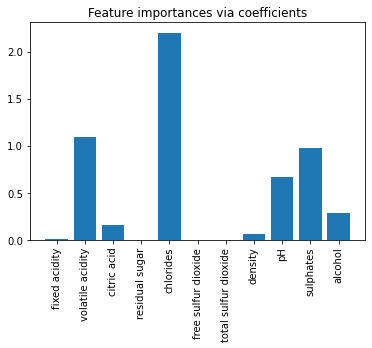

In [23]:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(red_train_data, red_train_labels)
importance = np.abs(ridge.coef_)
feature_names = np.array(red_train_data.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.show()

# Linear Regression Tests

In [20]:
#Expectaion: For Linear Regression I expect an extremely poor model given this data at a first glance has no sort of 
#lienar relationship lets see how it perfroms on both wines.

linear_regression = LinearRegression(fit_intercept=False, normalize=False)
linear_regression_normalized = LinearRegression(fit_intercept=True, normalize=True)
print("Using all 11 features")
#RED
linear_regression.fit(red_train_data, red_train_labels)
linear_regression_normalized.fit(red_train_data, red_train_labels)
redScore = linear_regression.score(red_test_data, red_test_labels)
redScoreNormalized = linear_regression_normalized.score(red_test_data, red_test_labels)
print("Red Wine Score:",redScore)
print("Red Wine Score using Normalization:",redScoreNormalized)
#WHITE
linear_regression.fit(white_train_data, white_train_labels)
linear_regression_normalized.fit(white_train_data, white_train_labels)
whiteScore = linear_regression.score(white_test_data, white_test_labels)
whiteScoreNormalized = linear_regression_normalized.score(white_test_data, white_test_labels)
print("White Wine Score:",whiteScore)
print("White Wine Score using Normalization:",whiteScoreNormalized)


#RED
print("\nUsing features [0, 1, 2, 3, 5, 6, 7, 9, 10]")
linear_regression.fit(red_train_data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 9, 10]], red_train_labels)
linear_regression_normalized.fit(red_train_data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 9, 10]], red_train_labels)
redScore = linear_regression.score(red_test_data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 9, 10]], red_test_labels)
redScoreNormalized = linear_regression_normalized.score(red_test_data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 9, 10]], red_test_labels)
print("Red Wine Score:",redScore)
print("Red Wine Score using Normalization:",redScoreNormalized)

#Lets check our predicted and actuals
lr_preds = linear_regression_normalized.predict(red_test_data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 9, 10]])
lr_frame = pd.DataFrame()
lr_frame['predicted'] = lr_preds
lr_frame['actuals'] = list(red_test_labels)
lr_frame['correct'] = np.where( lr_frame['predicted'] == lr_frame['actuals'] , '1', '0')
print(lr_frame.iloc[:20,:])

#Lets see what accuracy is like if we round up and down predicted values 
lr_frame_up = pd.DataFrame()
lr_frame_up = lr_frame
lr_frame_up['predicted'] = lr_frame['predicted'].apply(np.ceil).astype(int)
lr_frame_up['correct'] = np.where( lr_frame_up['predicted'] == lr_frame_up['actuals'] , '1', '0')
count0 = lr_frame_up['correct'].value_counts()[0]
count1 = lr_frame_up['correct'].value_counts()[1]
print("Accuracy when rounded up:",count1/(count0+count1))

#Lets see what accuracy is like if we round up and down predicted values 
lr_frame_dn = pd.DataFrame()
lr_frame_dn = lr_frame
lr_frame_dn['predicted'] = lr_frame['predicted'].apply(np.floor).astype(int)
lr_frame_dn['correct'] = np.where( lr_frame_dn['predicted'] == lr_frame_dn['actuals'] , '1', '0')
count0 = lr_frame_dn['correct'].value_counts()[0]
count1 = lr_frame_dn['correct'].value_counts()[1]
print("Accuracy when rounded down:",count1/(count0+count1))


#WHITE
print("\nUsing features [0, 1, 3, 5, 7, 8, 9, 10]")
linear_regression.fit(white_train_data.iloc[:,[0, 1, 3, 5, 7, 8, 9, 10]], white_train_labels)
linear_regression_normalized.fit(white_train_data.iloc[:,[0, 1, 3, 5, 7, 8, 9, 10]], white_train_labels)
whiteScore = linear_regression.score(white_test_data.iloc[:,[0, 1, 3, 5, 7, 8, 9, 10]], white_test_labels)
whiteScoreNormalized = linear_regression_normalized.score(white_test_data.iloc[:,[0, 1, 3, 5, 7, 8, 9, 10]], white_test_labels)
print("White Wine Score:",whiteScore)
print("White Wine Score using Normalization:",whiteScoreNormalized)

print(("""\nRegardless of using the best features found using an exhaustive 
search the accuracy is still unnacceptable for a model linear regression is not a viable option for this 
analysis. This holds true even for rounding the outputs of the linear regression."""))

Using all 11 features
Red Wine Score: 0.34980055946219735
Red Wine Score using Normalization: 0.348869535001358
White Wine Score: 0.27673532122970557
White Wine Score using Normalization: 0.2854156556033134

Using features [0, 1, 2, 3, 5, 6, 7, 9, 10]
Red Wine Score: 0.36050388650824605
Red Wine Score using Normalization: 0.3655600344898793
    predicted  actuals correct
0    6.597536        6       0
1    5.036009        5       0
2    5.029513        5       0
3    5.616157        5       0
4    5.194210        5       0
5    5.643760        5       0
6    5.112145        5       0
7    6.300475        6       0
8    6.759829        6       0
9    5.659503        5       0
10   5.668346        5       0
11   5.598390        4       0
12   5.335372        5       0
13   5.319290        5       0
14   5.087449        5       0
15   5.778439        6       0
16   6.321489        7       0
17   5.888516        5       0
18   6.331110        6       0
19   6.147185        7       0
Accura

# Logistic Regression Tests

In [21]:
#Lets see how logistic regression performs on all 11 features then we will apply feature extraction and hyperparameter tuning
logistic_regression = LogisticRegression(random_state=0)
print("Using all 11 features")
#RED
logistic_regression.fit(red_train_data, red_train_labels)
redScore = logistic_regression.score(red_test_data, red_test_labels)
print("Red Wine Score:",redScore)
#WHITE
logistic_regression.fit(white_train_data, white_train_labels)
whiteScore = logistic_regression.score(white_test_data, white_test_labels)
print("White Wine Score:",whiteScore)

#Logistic Regression is substantially better than linear regression for both wine types lets use the best features 
#we determined from earlier 
#RED
print("Using features [0, 1, 3, 4, 9, 10]")
logistic_regression.fit(red_train_data.iloc[:,[0, 1, 3, 4, 9, 10]], red_train_labels)
redScore = logistic_regression.score(red_test_data.iloc[:,[0, 1, 3, 4, 9, 10]], red_test_labels)
print("Red Wine Score:",redScore)
#WHITE
print("Using features [1, 2, 3, 7, 9, 10]")
logistic_regression.fit(white_train_data.iloc[:,[1, 2, 3, 7, 9, 10]], white_train_labels)
whiteScore = logistic_regression.score(white_test_data.iloc[:,[1, 2, 3, 7, 9, 10]], white_test_labels)
print("White Wine Score:",whiteScore)

#Given this is a decent base model lets do a RandomSearch to tune some hyperparameters 
dual = [True, False]
tol = [x for x in np.linspace(start = 1e-4, stop = 1e-1, num = 10)]
tol.append(None)
C = [x for x in np.linspace(start = 0.1, stop = 3.0, num = 20)]
C.append(None)
fit_intercept = [True, False]
penalty=['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
random_grid = {'dual': dual,
               'tol': tol,
               'C': C,
               'fit_intercept': fit_intercept,
               'penalty':penalty,
               'solver':solver}


logistic_regression_random = RandomizedSearchCV(estimator = logistic_regression, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
logistic_regression_random.fit(red_train_data.iloc[:,[0, 1, 3, 4, 9, 10]], red_train_labels)
print(logistic_regression_random.best_params_)
print(logistic_regression_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
log_reg = LogisticRegression(**logistic_regression_random.best_params_)
log_reg.fit(red_train_data.iloc[:,[0, 1, 3, 4, 9, 10]], red_train_labels)
print(log_reg.score(red_test_data.iloc[:,[0, 1, 3, 4, 9, 10]], red_test_labels))


logistic_regression_random.fit(white_train_data.iloc[:,[1, 2, 3, 7, 9, 10]], white_train_labels)
print(logistic_regression_random.best_params_)
print(logistic_regression_random.best_score_)
print('Using Best Parameters White Wine on Testing Data:')
log_reg = LogisticRegression(**logistic_regression_random.best_params_)
log_reg.fit(white_train_data.iloc[:,[1, 2, 3, 7, 9, 10]], white_train_labels)
print(log_reg.score(white_test_data.iloc[:,[1, 2, 3, 7, 9, 10]], white_test_labels))


Using all 11 features
Red Wine Score: 0.5675
White Wine Score: 0.46122448979591835
Using features [0, 1, 3, 4, 9, 10]
Red Wine Score: 0.5975
Using features [1, 2, 3, 7, 9, 10]
White Wine Score: 0.5436734693877551
Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'tol': 0.055600000000000004, 'solver': 'newton-cg', 'penalty': 'l2', 'fit_intercept': True, 'dual': False, 'C': 1.6263157894736844}
0.5771303258145363
Using Best Parameters Red Wine on Testing Data:
0.5875
Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'fit_intercept': False, 'dual': False, 'C': 3.0}
0.5308992485883243
Using Best Parameters White Wine on Testing Data:
0.529795918367347


# Naive Bayes Tests

In [102]:
#GaussianNB
print("GaussianNB")
gnb = GaussianNB()
gnb.fit(red_train_data, red_train_labels)
print(gnb.score(red_test_data, red_test_labels))
gnb.fit(white_train_data, white_train_labels)
print(gnb.score(white_test_data, white_test_labels))

#MultinomialNB
print("\nMultinomialNB")
mnb = MultinomialNB()
mnb.fit(red_train_data, red_train_labels)
print(mnb.score(red_test_data, red_test_labels))
mnb.fit(white_train_data, white_train_labels)
print(mnb.score(white_test_data, white_test_labels))

#ComplementNB
print("\nComplementNB")
cnb = ComplementNB()
cnb.fit(red_train_data, red_train_labels)
print(cnb.score(red_test_data, red_test_labels))
cnb.fit(white_train_data, white_train_labels)
print(cnb.score(white_test_data, white_test_labels))

#BernoulliNB
print("\nBernoulliNB")
bnb = BernoulliNB()
bnb.fit(red_train_data, red_train_labels)
print(bnb.score(red_test_data, red_test_labels))
bnb.fit(white_train_data, white_train_labels)
print(bnb.score(white_test_data, white_test_labels))

#CategoricalNB
print("\nCategoricalNB")
catnb = CategoricalNB()
catnb.fit(red_train_data, red_train_labels)
print(bnb.score(red_test_data, red_test_labels))
catnb.fit(white_train_data, white_train_labels)
print(catnb.score(white_test_data, white_test_labels))

#Looks like Gaussian is the best for Red and Categorical is the best for White so lets focus on tuning these
print("\nTuned GaussianNB for Red Wine")
gnb = GaussianNB(var_smoothing=1e-22)
gnb.fit(red_train_data.iloc[:,[7,8,9,10]], red_train_labels)
print(gnb.score(red_test_data.iloc[:,[7,8,9,10]], red_test_labels))
print("Features [7,8,9,10] seem to be generally good features for Red Wine")

#CategoricalNB
print("\nTuned CategoricalNB for White Wine")
catnb = CategoricalNB(alpha=0.01,fit_prior=True)
catnb.fit(white_train_data.iloc[:,:], white_train_labels)
print(catnb.score(white_test_data.iloc[:,:], white_test_labels))
print("Using all features for white wine in this case gives the best acuracy. Lowering the alpha value helps too.")

#Fined tuned parameters and features still dont outperfrom the Logistic Regression models

GaussianNB
0.5325
0.4179591836734694

MultinomialNB
0.4275
0.3836734693877551

ComplementNB
0.455
0.3461224489795918

BernoulliNB
0.42
0.44081632653061226

CategoricalNB
0.3725
0.483265306122449

Tuned GaussianNB for Red Wine
0.57
Features [7,8,9,10] seem to be generally good features for Red Wine

Tuned CategoricalNB for White Wine
0.49714285714285716
Using all features for white wine in this case gives the best acuracy. Lowering the alpha value helps too.


# KNN Tests

In [753]:
#From eariler we know the best configurations of parameters for red and white wines using KNN
#[1, 2, 8, 9, 10] for red and [1, 3, 7, 8, 9, 10] for white lets do a random search and try to get the 
#best hyperparameter setup for knn


n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
p = [1,2]

random_grid = {'n_neighbors': n_neighbors,
               'algorithm': algorithm,
               'leaf_size':leaf_size,
               'p':p}

print(random_grid)
knn = KNeighborsClassifier()

# knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=10, random_state=42, n_jobs = -1)

knn_random = GridSearchCV(estimator=knn, param_grid=random_grid, verbose=0, cv=3, n_jobs=5)

# Fit the random search model
knn_random.fit(red_train_data.iloc[:,[1, 2, 8, 9, 10]], red_train_labels)
print(knn_random.best_params_)
print(knn_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
knn_best = KNeighborsClassifier(**knn_random.best_params_)
knn_best.fit(red_train_data.iloc[:,[1, 2, 8, 9, 10]], red_train_labels)
print(knn_best.score(red_test_data.iloc[:,[1, 2, 8, 9, 10]], red_test_labels))
knn_best.fit(ss_red_train_data.iloc[:,[1, 2, 8, 9, 10]], red_train_labels)
print(knn_best.score(ss_red_test_data.iloc[:,[1, 2, 8, 9, 10]], red_test_labels))

#White
knn_random.fit(white_train_data.iloc[:,[1, 3, 7, 8, 9, 10]], white_train_labels)
print(knn_random.best_params_)
print(knn_random.best_score_)
print('Using Best Parameters White Wine on Testing Data:')
knn_best = KNeighborsClassifier(**knn_random.best_params_)
knn_best.fit(white_train_data.iloc[:,[1, 3, 7, 8, 9, 10]], white_train_labels)
print(knn_best.score(white_test_data.iloc[:,[1, 3, 7, 8, 9, 10]], white_test_labels))
knn_best.fit(ss_white_train_data.iloc[:,[1, 3, 7, 8, 9, 10]], white_train_labels)
print(knn_best.score(ss_white_test_data.iloc[:,[1, 3, 7, 8, 9, 10]], white_test_labels))
#Even with tuning hyperparameters we cannot achieve better than 0.65 and 0.605 accuracy on trainng
#Regardless this is still the best model thus far. Applying standard scalar does not improve performance either.

{'n_neighbors': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'p': [1, 2]}
{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
0.5796386800334168
Using Best Parameters Red Wine on Testing Data:
0.65
0.6225
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
0.5584029167222445
Using Best Parameters White Wine on Testing Data:
0.6024489795918367
0.5959183673469388


# Decision Trees Test

In [85]:
#Here we dont know the exact configuration of ideal features so we will have to tweak it around
#Lets see how a decision tree classifier can perform on all 11 features for both wine types

d_tree = DecisionTreeClassifier()
d_tree.fit(red_train_data, red_train_labels)
print("Red Score:",d_tree.score(red_test_data, red_test_labels))
d_tree.fit(white_train_data, white_train_labels)
print("White score:",d_tree.score(white_test_data, white_test_labels))

#Right of the bat we can see accuracy for a tree is good comparitively to other models using default params and all features
#Lets see what reducing the features down does 

d_tree.fit(red_train_data.iloc[:,[0,1,2,3,4,5,6,8,9,10]], red_train_labels)
print("Red Score with features [0,1,2,3,4,5,8,9,10]:",d_tree.score(red_test_data.iloc[:,[0,1,2,3,4,5,6,8,9,10]], red_test_labels))
d_tree.fit(white_train_data.iloc[:,[7,9,10]], white_train_labels)
print("White score with features [7,9,10]:",d_tree.score(white_test_data.iloc[:,[7,9,10]], white_test_labels))

#Interesting, in the case of the decision tree having more features results in better performance 
#Knowing this lets use all features for both sets and tune the trees hyperparameters to hopefully
#achieve better than 65 and 60.1 accuracy compared to the best KNN model

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(start = 500, stop = 100000, num = 50)]
max_depth.append(None)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
min_weight_fraction_leaf = [x for x in np.linspace(start = 0.0, stop = 8.0, num = 12)]
max_features = ['auto', 'sqrt', 'log2']
random_state = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
max_leaf_nodes = [int(x) for x in np.linspace(start = 50, stop = 500, num = 100)]
max_leaf_nodes.append(None)


random_grid = {'criterion': criterion,
               'splitter': splitter,               
              'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf               
             }

print(random_grid)

d_tree = DecisionTreeClassifier()
d_tree_random = GridSearchCV(estimator=d_tree, param_grid=random_grid, verbose=0, cv=3)
# Fit the random search model
d_tree_random.fit(red_train_data, red_train_labels)
print(d_tree_random.best_params_)
print(d_tree_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
d_tree_best = DecisionTreeClassifier(**d_tree_random.best_params_)
d_tree_best.fit(red_train_data, red_train_labels)
print(d_tree_best.score(red_test_data, red_test_labels))

#White
d_tree_random.fit(white_train_data, white_train_labels)
print(d_tree_random.best_params_)
print(d_tree_random.best_score_)

print('Using Best Parameters White Wine on Testing Data:')
d_tree_best = DecisionTreeClassifier(**d_tree_random.best_params_)
d_tree_best.fit(white_train_data, white_train_labels)
print(d_tree_best.score(white_test_data, white_test_labels))

#Even after tweaking the important hyperparameters using an exhaustive gridsearch for the tree
#they can't outperfrom the default model
#Aditionally, KNN still has better accuracy for both red and white wines

# tree.plot_tree(d_tree)
# plt.figure()
# tree.plot_tree(d_tree, filled=True)
# plt.title("Decision tree trained on all features")
# plt.show()


Red Score: 0.62
White score: 0.5836734693877551
Red Score with features [0,1,2,3,4,5,8,9,10]: 0.61
White score with features [7,9,10]: 0.566530612244898
{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [500, 2530, 4561, 6591, 8622, 10653, 12683, 14714, 16744, 18775, 20806, 22836, 24867, 26897, 28928, 30959, 32989, 35020, 37051, 39081, 41112, 43142, 45173, 47204, 49234, 51265, 53295, 55326, 57357, 59387, 61418, 63448, 65479, 67510, 69540, 71571, 73602, 75632, 77663, 79693, 81724, 83755, 85785, 87816, 89846, 91877, 93908, 95938, 97969, 100000, None], 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])}
{'criterion': 'gini', 'max_depth': 4561, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'splitter': 'random'}
0.5737698412698413
Using Best Parameters Red Wine on Testing Data:
0.495
{'criterion': 'gini', 'max_depth': 500, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 's

# Random Forests Test

In [113]:
#Lets start by testing a default random forests on all 11 features 
rf = RandomForestClassifier()
rf.fit(red_train_data, red_train_labels)
print("Red Score:", rf.score(red_test_data, red_test_labels))
rf.fit(white_train_data, white_train_labels)
print("White Score:", rf.score(white_test_data, white_test_labels))
#Lets check if StandardScalar effects the RF
rf.fit(ss_red_train_data, red_train_labels)
print("SS Red Score:", rf.score(ss_red_test_data, red_test_labels))
rf.fit(ss_white_train_data, white_train_labels)
print("SS White Score:", rf.score(ss_white_test_data, white_test_labels))
#Standard Scalar doesnt effect the outcome much

#Lets now test with the most popular features
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = red_train_data.iloc[:,list(s)]
        tst = red_test_data.iloc[:,list(s)]
        if list(s):
            rf.fit(trn, red_train_labels)
            scoreR = rf.score(tst, red_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)
print(f'Red Best param combination {max_key}, with a score of {max_value}')
#Red Best param combination [1, 3, 4, 6, 9, 10], with a score of 0.7075

Red Score: 0.6725
White Score: 0.6628571428571428
SS Red Score: 0.69
SS White Score: 0.6669387755102041
Red Best param combination [1, 3, 4, 6, 9, 10], with a score of 0.7075


In [114]:
#Lets now test with the most popular features for white wine using random forest
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = white_train_data.iloc[:,list(s)]
        tst = white_test_data.iloc[:,list(s)]
        if list(s):
            rf.fit(trn, white_train_labels)
            scoreW = rf.score(tst, white_test_labels)
            scores[str(list(s))] = scoreW
max_value = max(scores.values())
max_key = max(scores,key=scores.get)
print(f'White Best param combination {max_key}, with a score of {max_value}')
#White Best param combination [0, 1, 2, 4, 5, 6, 9, 10], with a score of 0.6742857142857143

White Best param combination [0, 1, 2, 4, 5, 6, 9, 10], with a score of 0.6742857142857143


In [188]:
#Now that we have the best feature combos for the wine lets see if we can tweak hyperparams and get more accuracy
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_depth.append(None)
min_samples_split = np.linspace(0.1, 1.0, 5, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
# min_weight_fraction_leaf = [x for x in np.linspace(start = 0.0, stop = 8.0, num = 12)]
# max_features = ['auto', 'sqrt', 'log2']
# random_state = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
# max_leaf_nodes = [int(x) for x in np.linspace(start = 50, stop = 500, num = 100)]
# max_leaf_nodes.append(None)


p_grid = {'n_estimators':n_estimators,
               'criterion': criterion,                              
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
              }

print(p_grid)

rf = RandomForestClassifier()
rf_random = GridSearchCV(estimator=rf, param_grid=p_grid, verbose=0, cv=3, n_jobs=5)
# Fit the random search model
rf_random.fit(red_train_data.iloc[:,[1, 3, 4, 6, 9, 10]], red_train_labels)
print(rf_random.best_params_)
print(rf_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
rf_best = RandomForestClassifier(**rf_random.best_params_)
rf_best.fit(red_train_data.iloc[:,[1, 3, 4, 6, 9, 10]], red_train_labels)
print(rf_best.score(red_test_data.iloc[:,[1, 3, 4, 6, 9, 10]], red_test_labels))

#Once again default parameters reign supreme lets try on white wine just to make sure 

{'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [100, 200, 300, 400, 500, None], 'min_samples_split': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5])}
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 0.1, 'min_samples_split': 0.325, 'n_estimators': 200}
0.5854761904761905
Using Best Parameters Red Wine on Testing Data:
0.58


In [190]:
rf_random = GridSearchCV(estimator=rf, param_grid=p_grid, verbose=0, cv=3, n_jobs=5)
# Fit the random search model
rf_random.fit(white_train_data.iloc[:,[0, 1, 2, 4, 5, 6, 9, 10]], white_train_labels)
print(rf_random.best_params_)
print(rf_random.best_score_)

print('Using Best Parameters White Wine on Testing Data:')
rf_best = RandomForestClassifier(**rf_random.best_params_)
rf_best.fit(white_train_data.iloc[:,[0, 1, 2, 4, 5, 6, 9, 10]], white_train_labels)
print(rf_best.score(white_test_data.iloc[:,[0, 1, 2, 4, 5, 6, 9, 10]], white_test_labels))

{'criterion': 'gini', 'max_depth': 200, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100}
0.519462896269619
Using Best Parameters White Wine on Testing Data:
0.5053061224489795


# Support Vector Machines Tests

In [167]:
svm = SVC(kernel='rbf')
svm.fit(ss_red_train_data, red_train_labels)
print("Default Red Score:",svm.score(ss_red_test_data, red_test_labels))
svm.fit(ss_white_train_data, white_train_labels)
print("Default White Score:",svm.score(ss_white_test_data, white_test_labels))

Default Red Score: 0.6025
Default White Score: 0.5583673469387755


In [168]:
#Lets now test with the most popular features
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = ss_red_train_data.iloc[:,list(s)]
        tst = ss_red_test_data.iloc[:,list(s)]
        if list(s):
            svm.fit(trn, red_train_labels)
            scoreR = svm.score(tst, red_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)
print(f'Red Best param combination {max_key}, with a score of {max_value}')
#Red Best param combination [0, 1, 2, 5, 7, 9, 10], with a score of 0.625


Red Best param combination [0, 1, 2, 5, 7, 9, 10], with a score of 0.625


In [169]:
#Lets now test with the most popular features
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = ss_white_train_data.iloc[:,list(s)]
        tst = ss_white_test_data.iloc[:,list(s)]
        if list(s):
            svm.fit(trn, white_train_labels)
            scoreR = svm.score(tst, white_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)
print(f'White Best param combination {max_key}, with a score of {max_value}')
#White Best param combination [0, 1, 2, 5, 7, 8, 9, 10], with a score of 0.5648979591836735


White Best param combination [0, 1, 2, 5, 7, 8, 9, 10], with a score of 0.5648979591836735


In [179]:
#Tune Hyper Params

C = [x for x in np.linspace(start = 0.05, stop = 1.0, num = 5)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
gamma = ['scale','auto']
p_grid = {'C':C,
          'kernel': kernel,
          'degree': degree,
          'gamma':gamma
              }

print(p_grid)

svm = SVC()
svm_random = GridSearchCV(estimator=svm, param_grid=p_grid, verbose=0, cv=3,n_jobs=5)
# svm_random = RandomizedSearchCV(estimator = svm, param_distributions = p_grid, n_iter = 10, cv = 3, verbose=10, random_state=42, n_jobs = -1)


# Fit the random search model
svm_random.fit(ss_red_train_data.iloc[:,[0, 1, 2, 5, 7, 9, 10]], red_train_labels)
print(svm_random.best_params_)
print(svm_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
svm_best = SVC(**svm_random.best_params_)
svm_best.fit(ss_red_train_data.iloc[:,[0, 1, 2, 5, 7, 9, 10]], red_train_labels)
print(svm_best.score(ss_red_test_data.iloc[:,[0, 1, 2, 5, 7, 9, 10]], red_test_labels))

#Looks like we are capped at 0.625 for red wine accuracy lets see if white can increase at all 

{'C': [0.05, 0.2875, 0.525, 0.7625, 1.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 3, 5, 7, 10], 'gamma': ['scale', 'auto']}
{'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.5904949874686717
Using Best Parameters Red Wine on Testing Data:
0.625


In [184]:
# Fit the random search model
svm_random.fit(ss_white_train_data.iloc[:,[0, 1, 2, 5, 7, 8, 9, 10]], white_train_labels)
print(svm_random.best_params_)
print(svm_random.best_score_)

print('Using Best Parameters White Wine on Testing Data:')
svm_best = SVC(**svm_random.best_params_)
svm_best.fit(ss_white_train_data.iloc[:,[0, 1, 2, 5, 7, 8, 9, 10]], white_train_labels)
print(svm_best.score(ss_white_test_data.iloc[:,[0, 1, 2, 5, 7, 8, 9, 10]], white_test_labels))
#Default is best for white wine

{'C': 0.7625, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.5556742697078831
Using Best Parameters White Wine on Testing Data:
0.5575510204081633


# AdaBoost Test

In [185]:
#Lets start by testing a default adaboost on all 11 features 
ada = AdaBoostClassifier()
ada.fit(red_train_data, red_train_labels)
print("Red Score:", ada.score(red_test_data, red_test_labels))
ada.fit(white_train_data, white_train_labels)
print("White Score:", ada.score(white_test_data, white_test_labels))
#Lets check if StandardScalar effects the RF
ada.fit(ss_red_train_data, red_train_labels)
print("SS Red Score:", ada.score(ss_red_test_data, red_test_labels))
ada.fit(ss_white_train_data, white_train_labels)
print("SS White Score:", ada.score(ss_white_test_data, white_test_labels))
#Standard Scalar doesnt effect the outcome at all
#Adaboost is very poor for predicting lets try to manipulate the best features



Red Score: 0.465
White Score: 0.433469387755102
SS Red Score: 0.465
SS White Score: 0.433469387755102


In [186]:
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = red_train_data.iloc[:,list(s)]
        tst = red_test_data.iloc[:,list(s)]
        if list(s):
            ada.fit(trn, red_train_labels)
            scoreR = ada.score(tst, red_test_labels)
            scores[str(list(s))] = scoreR
max_value = max(scores.values())
max_key = max(scores,key=scores.get)
print(f'Red Best param combination {max_key}, with a score of {max_value}')
#Red Best param combination [1, 2, 4, 8, 9, 10], with a score of 0.5675


Red Best param combination [1, 2, 4, 8, 9, 10], with a score of 0.5675


In [187]:
params = [0,1,2,3,4,5,6,7,8,9,10]
scores = dict()
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        trn = white_train_data.iloc[:,list(s)]
        tst = white_test_data.iloc[:,list(s)]
        if list(s):
            ada.fit(trn, white_train_labels)
            scoreW = ada.score(tst, white_test_labels)
            scores[str(list(s))] = scoreW
max_value = max(scores.values())
max_key = max(scores,key=scores.get)
print(f'White Best param combination {max_key}, with a score of {max_value}')
#White Best param combination [1, 3, 6, 8, 10], with a score of 0.5004081632653061


White Best param combination [1, 3, 6, 8, 10], with a score of 0.5004081632653061


In [208]:
#Lets tune some hyperparams see what happens

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
learning_rate = [x for x in np.linspace(start = 0.001, stop = 1.0, num = 50)]

p_grid = {'n_estimators':n_estimators,
          'learning_rate': learning_rate        
         }

print(p_grid)

ada = AdaBoostClassifier()
ada_random = GridSearchCV(estimator=ada, param_grid=p_grid, verbose=0, cv=2,n_jobs=5)


# Fit the random search model
ada_random.fit(red_train_data.iloc[:,[1, 2, 4, 8, 9, 10]], red_train_labels)
print(ada_random.best_params_)
print(ada_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
ada_best = AdaBoostClassifier(**ada_random.best_params_)
ada_best.fit(red_train_data.iloc[:,[1, 2, 4, 8, 9, 10]], red_train_labels)
print(ada_best.score(red_test_data.iloc[:,[1, 2, 4, 8, 9, 10]], red_test_labels))
#Looks like a lower learning rate squeezes out more accuracy lets try white wine

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'learning_rate': [0.001, 0.021387755102040818, 0.041775510204081635, 0.062163265306122456, 0.08255102040816327, 0.10293877551020408, 0.12332653061224491, 0.1437142857142857, 0.16410204081632654, 0.18448979591836737, 0.20487755102040817, 0.225265306122449, 0.24565306122448982, 0.26604081632653065, 0.2864285714285714, 0.30681632653061225, 0.3272040816326531, 0.3475918367346939, 0.36797959183673473, 0.3883673469387755, 0.40875510204081633, 0.42914285714285716, 0.449530612244898, 0.4699183673469388, 0.49030612244897964, 0.5106938775510205, 0.5310816326530613, 0.551469387755102, 0.5718571428571428, 0.5922448979591837, 0.6126326530612245, 0.6330204081632653, 0.6534081632653062, 0.673795918367347, 0.6941836734693878, 0.7145714285714286, 0.7349591836734695, 0.7553469387755103, 0.775734693877551, 0.7961224489795918, 0.8165102040816327, 0.8368979591836735, 0.8572857142857143, 0.8776734693877551, 0.898061224

In [210]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]
learning_rate = [x for x in np.linspace(start = 0.001, stop = 1.0, num = 50)]

p_grid = {'n_estimators':n_estimators,
          'learning_rate': learning_rate        
         }

print(p_grid)

ada = AdaBoostClassifier()
ada_random = GridSearchCV(estimator=ada, param_grid=p_grid, verbose=0, cv=2,n_jobs=5)
ada_random.fit(white_train_data.iloc[:,[1, 3, 6, 8, 10]], white_train_labels)
print(ada_random.best_params_)
print(ada_random.best_score_)

print('Using Best Parameters Red Wine on Testing Data:')
ada_best = AdaBoostClassifier(**ada_random.best_params_)
ada_best.fit(white_train_data.iloc[:,[1, 3, 6, 8, 10]], white_train_labels)
print(ada_best.score(white_test_data.iloc[:,[1, 3, 6, 8, 10]], white_test_labels))

#Looks like the default is better for white wine

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'learning_rate': [0.001, 0.021387755102040818, 0.041775510204081635, 0.062163265306122456, 0.08255102040816327, 0.10293877551020408, 0.12332653061224491, 0.1437142857142857, 0.16410204081632654, 0.18448979591836737, 0.20487755102040817, 0.225265306122449, 0.24565306122448982, 0.26604081632653065, 0.2864285714285714, 0.30681632653061225, 0.3272040816326531, 0.3475918367346939, 0.36797959183673473, 0.3883673469387755, 0.40875510204081633, 0.42914285714285716, 0.449530612244898, 0.4699183673469388, 0.49030612244897964, 0.5106938775510205, 0.5310816326530613, 0.551469387755102, 0.5718571428571428, 0.5922448979591837, 0.6126326530612245, 0.6330204081632653, 0.6534081632653062, 0.673795918367347, 0.6941836734693878, 0.7145714285714286, 0.7349591836734695, 0.7553469387755103, 0.77573469

# Neural Network Test

In [474]:
#Lets Test a NN with all 11 Features as inputs

# Build the model
model = Sequential()
model.add(Dense(11, input_shape=(11,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history1 = model.fit(ss_red_train_data, red_train_labels, 
                     validation_data=(ss_red_test_data, red_test_labels), verbose=2, batch_size=15, epochs=10)

#Test on unseen data
results = model.evaluate(ss_red_test_data, red_test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                132       
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
80/80 - 0s - loss: 1.4864 - accuracy: 0.4153 - val_loss: 1.1373 - val_accuracy: 0.5325 - 395ms/epoch - 5ms/step
Epoch 2/10
80/80 - 0s - loss

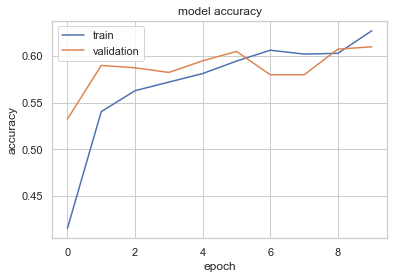

In [475]:
epochs = range(0,10)
plt.plot(epochs,history1.history['accuracy'][0:10])
plt.plot(epochs,history1.history['val_accuracy'][0:10])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

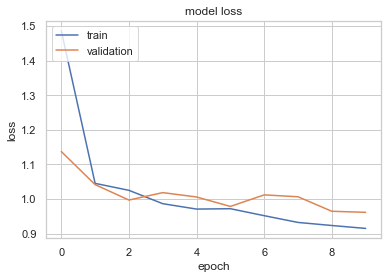

In [476]:
plt.plot(epochs,history1.history['loss'][0:10])
plt.plot(epochs,history1.history['val_loss'][0:10])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# Build the model with 3 input features
model = Sequential()
model.add(Dense(11, input_shape=(3,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history2 = model.fit(ss_red_train_data.iloc[:,[8,9,10]], red_train_labels, validation_data=(ss_red_test_data.iloc[:,[8,9,10]], red_test_labels), verbose=2, batch_size=15, epochs=10)
print(max(history2.history['val_accuracy']))
#Test on unseen data
results = model.evaluate(ss_red_test_data.iloc[:,[8,9,10]], red_test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                44        
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
80/80 - 0s - loss: 1.3606 - accuracy: 0.4871 - val_loss: 1.0884 - val_accuracy: 0.5675 - 385ms/epoch - 5ms/step
Epoch 2/10
80/80 - 0s - loss:

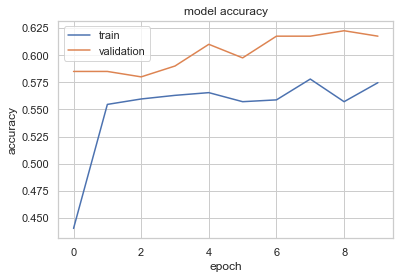

In [478]:
epochs = range(0,10)
plt.plot(epochs,history2.history['accuracy'][0:10])
plt.plot(epochs,history2.history['val_accuracy'][0:10])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

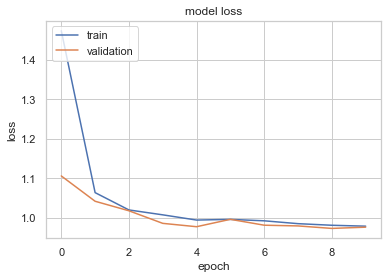

In [479]:
plt.plot(epochs,history2.history['loss'][0:10])
plt.plot(epochs,history2.history['val_loss'][0:10])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [481]:
# Build the model with 3 input features
model = Sequential()
model.add(Dense(11, input_shape=(5,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history2 = model.fit(ss_red_train_data.iloc[:,[1,3,8,9,10]], red_train_labels, validation_data=(ss_red_test_data.iloc[:,[1,3,8,9,10]], red_test_labels), verbose=2, batch_size=15, epochs=10)
print(max(history2.history['val_accuracy']))
#Test on unseen data
results = model.evaluate(ss_red_test_data.iloc[:,[1,3,8,9,10]], red_test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                66        
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
80/80 - 0s - loss: 1.8657 - accuracy: 0.4053 - val_loss: 1.3762 - val_accuracy: 0.5325 - 395ms/epoch - 5ms/step
Epoch 2/10
80/80 - 0s - los

In [482]:
# Build the model White
model = Sequential()
model.add(Dense(11, input_shape=(11,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history1 = model.fit(ss_white_train_data, white_train_labels, 
                     validation_data=(ss_white_test_data, white_test_labels), verbose=2, batch_size=15, epochs=10)

#Test on unseen data
results = model.evaluate(ss_white_test_data, white_test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                132       
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
245/245 - 1s - loss: 1.2623 - accuracy: 0.5048 - val_loss: 1.1137 - val_accuracy: 0.5233 - 515ms/epoch - 2ms/step
Epoch 2/10
245/245 - 0s -

In [791]:
# Build the model White
model = Sequential()
model.add(Dense(11, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history1 = model.fit(ss_white_train_data.iloc[:,[1,7,9,10]], white_train_labels, 
                     validation_data=(ss_white_test_data.iloc[:,[1,7,9,10]], white_test_labels), verbose=2, batch_size=15, epochs=10)

#Test on unseen data
results = model.evaluate(ss_white_test_data.iloc[:,[1,7,9,10]], white_test_labels)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                55        
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
245/245 - 1s - loss: 1.2856 - accuracy: 0.4884 - val_loss: 1.1387 - val_accuracy: 0.5118 - 856ms/epoch - 3ms/step
Epoch 2/10
245/245 - 0s -

# Accuracy Graph of Best Models

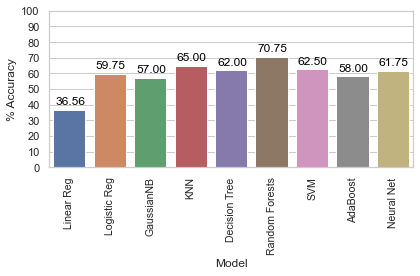

In [818]:
accR = [0.3655600344898793,0.5975,0.57,0.65, 0.62, 0.7075,0.625,0.58,0.617500]
accR = [i * 100 for i in accR]

df = pd.DataFrame({'Model': ['Linear Reg', 'Logistic Reg','GaussianNB','KNN', 'Decision Tree', 'Random Forests', 'SVM', 'AdaBoost','Neural Net'],
 'Accuracy': accR})

sns.set(style='whitegrid')
graph = sns.barplot(x='Model', y='Accuracy', data=df)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()),
     (p.get_x()+0.42, p.get_height()+2.0),
     ha='center', va='bottom',
     color= 'black')
# plt.title('Accuracy of Best Tested Classifiers For Red Wines ', fontsize=16)
plt.xlabel('Model')
plt.ylabel('% Accuracy')
plt.xticks(size=10.5,rotation = 90)
plt.yticks([int(x) for x in np.linspace(start = 0, stop = 100, num = 11)])
plt.tight_layout()
# plt.show()

plt.savefig('acc_red_old.pdf')

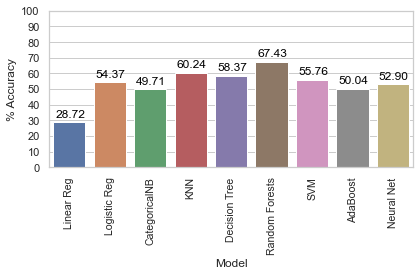

In [817]:
accW = [0.2872198271047467,0.5436734693877551,0.49714285714285716,
        0.6024489795918367,0.5836734693877551,0.6742857142857143,0.5575510204081633,0.5004081632653061,0.528980]
accW = [i * 100 for i in accW]



df = pd.DataFrame({'Model': ['Linear Reg', 'Logistic Reg','CategoricalNB','KNN', 'Decision Tree', 'Random Forests', 'SVM', 'AdaBoost','Neural Net'],
 'Accuracy': accW})

sns.set(style='whitegrid')
graph = sns.barplot(x='Model', y='Accuracy', data=df)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()),
     (p.get_x()+0.42, p.get_height()+2.0),
     ha='center', va='bottom',
     color= 'black')
# plt.title('Accuracy of Best Tested Classifiers For White Wines ', fontsize=16)
plt.xlabel('Model')
plt.ylabel('% Accuracy')
plt.xticks(size=10.5,rotation = 90)
plt.yticks([int(x) for x in np.linspace(start = 0, stop = 100, num = 11)])
plt.tight_layout()

# plt.show()
plt.savefig('acc_white_old.pdf')

# Changing the Problem Space to (0 - poor , 1 - mediocre , 2 - good)

Given these models perfromed relitevely poorly with the best just barley achieving 70% accuracy I figure it be a good opportunity to chnage the problem such the qualites less than 4 are poor, 5 & 6 are mediocre, and 7-10 are good. There was not much separation in the data between 5s and 6s making classification difficult. Lets test our top 2 models KNN and Random Forest along with the Neural net on this new batch of data with different class labels.

In [497]:
conditions = [
    (wine_red['quality'] < 5),
    (wine_red['quality'] >= 5) & (wine_red['quality'] <= 6),
    (wine_red['quality'] > 6)     
    ]
values = [0, 1, 2]
wine_red['score'] = np.select(conditions, values)

In [499]:
conditions = [
    (wine_white['quality'] < 5),
    (wine_white['quality'] >= 5) & (wine_white['quality'] <= 6),
    (wine_white['quality'] > 6)     
    ]
values = [0, 1, 2]
wine_white['score'] = np.select(conditions, values)

In [503]:
wine_red.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,score
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [504]:
wine_white.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,score
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [510]:
#Now lets make data and label sets and seperate into train and test
wine_red_data = wine_red.drop(['quality','score'], axis=1)
wine_red_labels = wine_red.drop(['fixed acidity','volatile acidity','citric acid','residual sugar',
                   'chlorides','free sulfur dioxide','total sulfur dioxide',
                   'density','pH','sulphates','alcohol', 'quality'],axis=1)


wine_white_data = wine_white.drop(['quality','score'], axis=1)
wine_white_labels = wine_white.drop(['fixed acidity','volatile acidity','citric acid','residual sugar',
                   'chlorides','free sulfur dioxide','total sulfur dioxide',
                   'density','pH','sulphates','alcohol', 'quality'],axis=1)


In [511]:
wine_red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [512]:
wine_red_labels.head()

,score
0,1
1,1
2,1
3,1
4,1


In [513]:
wine_white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [514]:
wine_white_labels.head()

,score
0,1
1,1
2,1
3,1
4,1


In [805]:
#Lets now separate out train and test for both wine types

wine_red_train_data, wine_red_test_data, wine_red_train_labels, wine_red_test_labels = (train_test_split
                                            (wine_red_data, wine_red_labels, test_size=0.25, random_state=500))

wine_white_train_data, wine_white_test_data, wine_white_train_labels, wine_white_test_labels = (train_test_split
                                            (wine_white_data, wine_white_labels, test_size=0.25, random_state=500))

#We now have both training and validation sets for both wine type which contain all 11 attributes
#Lets also perfrom Standard Scaling to each train and test set to later use
scaler = StandardScaler()
scaler.fit(wine_red_train_data)
scaler.fit(wine_red_test_data)
scaler.fit(wine_white_train_data)
scaler.fit(wine_white_test_data)
wine_ss_red_train_data = scaler.transform(wine_red_train_data)
wine_ss_red_test_data = scaler.transform(wine_red_test_data)
wine_ss_white_train_data = scaler.transform(wine_white_train_data)
wine_ss_white_test_data = scaler.transform(wine_white_test_data)

wine_ss_red_train_data = pd.DataFrame(wine_ss_red_train_data)
wine_ss_red_test_data = pd.DataFrame(wine_ss_red_test_data)
wine_ss_white_train_data = pd.DataFrame(wine_ss_white_train_data)
wine_ss_white_test_data = pd.DataFrame(wine_ss_white_test_data)




In [520]:
print(wine_red_train_data.head())
print(wine_ss_red_train_data.head())
print(wine_red_train_labels.head())
print(wine_white_train_data.head())
print(wine_ss_white_train_data.head())
print(wine_white_train_labels.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
476             9.3              0.27         0.41             2.0      0.091   
348             9.6              0.56         0.31             2.8      0.089   
1430            7.4              0.41         0.24             1.8      0.066   
856             9.3              0.36         0.39             1.5      0.080   
655             9.7              0.55         0.17             2.9      0.087   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
476                   6.0                  16.0  0.99800  3.28       0.70   
348                  15.0                  46.0  0.99790  3.11       0.92   
1430                 18.0                  47.0  0.99560  3.37       0.62   
856                  41.0                  55.0  0.99652  3.47       0.73   
655                  20.0                  53.0  1.00040  3.14       0.61   

      alcohol  
476       9.7  
348      10.0  
14

# KNN Re-Test

In [800]:
params = {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
print('Using Best Parameters Red Wine on Testing Data:')
print("Params", params)
print("Features used [1, 2, 8, 9, 10]")
knn_best = KNeighborsClassifier(**params)
knn_best.fit(wine_red_train_data.iloc[:,[1, 2, 8, 9, 10]], wine_red_train_labels)
print("Red New Best Score:", knn_best.score(wine_red_test_data.iloc[:,[1, 2, 8, 9, 10]], wine_red_test_labels))
print("Previous best score: 0.65")

Using Best Parameters Red Wine on Testing Data:
Params {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
Features used [1, 2, 8, 9, 10]
Red New Best Score: 0.835
Previous best score: 0.65


In [801]:
params = {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
print('Using Best Parameters White Wine on Testing Data:')
print("Params", params)
print("Features used [1, 3, 7, 8, 9, 10]")
knn_best = KNeighborsClassifier(**params)
knn_best.fit(wine_white_train_data.iloc[:,[1, 3, 7, 8, 9, 10]], wine_white_train_labels)
print("White New Best Score: ", knn_best.score(wine_white_test_data.iloc[:,[1, 3, 7, 8, 9, 10]], wine_white_test_labels))
print("Previous best score: 0.602")

Using Best Parameters White Wine on Testing Data:
Params {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
Features used [1, 3, 7, 8, 9, 10]
White New Best Score:  0.793469387755102
Previous best score: 0.602


# Random Forests Re-Test

In [530]:
print('Using Best Parameters Red Wine on Testing Data:')
print("Params are default sklearn rf params")
print("Features used [1, 3, 4, 6, 9, 10]")
rf = RandomForestClassifier()
rf.fit(wine_red_train_data.iloc[:,[1, 3, 4, 6, 9, 10]], wine_red_train_labels)
print("Red New Best Score:", rf.score(wine_red_test_data.iloc[:,[1, 3, 4, 6, 9, 10]], wine_red_test_labels))
print("Previous best score: 0.7075")

Using Best Parameters Red Wine on Testing Data:
Params are default sklearn rf params
Features used [1, 3, 4, 6, 9, 10]
Red New Best Score: 0.86
Previous best score: 0.7075


In [531]:
print('Using Best Parameters White Wine on Testing Data:')
print("Params are default sklearn rf params")
print("Features used [0, 1, 2, 4, 5, 6, 9, 10]")
rf = RandomForestClassifier()
rf.fit(wine_white_train_data.iloc[:,[0, 1, 2, 4, 5, 6, 9, 10]], wine_white_train_labels)
print("Red New Best Score:", rf.score(wine_white_test_data.iloc[:,[0, 1, 2, 4, 5, 6, 9, 10]], wine_white_test_labels))
print("Previous best score: 0.674")

Using Best Parameters White Wine on Testing Data:
Params are default sklearn rf params
Features used [0, 1, 2, 4, 5, 6, 9, 10]
Red New Best Score: 0.8424489795918367
Previous best score: 0.674


In [806]:
print('Using Best Parameters Red Wine on Testing Data:')
params = {'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
svm_best = SVC(**params)
svm_best.fit(wine_ss_red_train_data.iloc[:,[0, 1, 2, 5, 7, 9, 10]], wine_red_train_labels)
print(svm_best.score(wine_ss_red_test_data.iloc[:,[0, 1, 2, 5, 7, 9, 10]], wine_red_test_labels))

Using Best Parameters Red Wine on Testing Data:
0.83


# Neural Net Re-Test

In [824]:
#Red
# Build the model with 3 input features
model = Sequential()
model.add(Dense(11, input_shape=(3,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history2 = model.fit(wine_ss_red_train_data.iloc[:,[8,9,10]], wine_red_train_labels, validation_data=(wine_ss_red_test_data.iloc[:,[8,9,10]], wine_red_test_labels), verbose=2, batch_size=15, epochs=10)
# history2 = model.fit(wine_ss_red_train_data, wine_red_train_labels, validation_data=(wine_ss_red_test_data, wine_red_test_labels), verbose=2, batch_size=15, epochs=10)
print(max(history2.history['val_accuracy']))
#Test on unseen data
results = model.evaluate(wine_ss_red_test_data.iloc[:,[8,9,10]], wine_red_test_labels)
# results = model.evaluate(wine_ss_red_test_data, wine_red_test_labels)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                44        
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 3)                 15        
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
80/80 - 0s - loss: 0.8348 - accuracy: 0.7673 - val_loss: 0.6619 - val_accuracy: 0.8100 - 450ms/epoch - 6ms/step
Epoch 2/10
80/80 - 0s - los

In [823]:
#White
# Build the model with 3 input features
model = Sequential()
model.add(Dense(11, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dropout(.01, name="drop1"))
model.add(Dense(4, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
# history2 = model.fit(wine_ss_red_train_data.iloc[:,[1,7,9,10]], wine_red_train_labels, validation_data=(wine_ss_red_test_data.iloc[:,[8,9,10]], wine_red_test_labels), verbose=2, batch_size=15, epochs=10)
history2 = model.fit(wine_ss_white_train_data.iloc[:,[1,7,9,10]], wine_white_train_labels, validation_data=(wine_ss_white_test_data.iloc[:,[1,7,9,10]], wine_white_test_labels), verbose=2, batch_size=15, epochs=10)
print(max(history2.history['val_accuracy']))
#Test on unseen data
# results = model.evaluate(wine_ss_red_test_data.iloc[:,[1,7,9,10]], wine_red_test_labels)
results = model.evaluate(wine_ss_white_test_data.iloc[:,[1,7,9,10]], wine_white_test_labels)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 11)                55        
                                                                 
 drop1 (Dropout)             (None, 11)                0         
                                                                 
 fc2 (Dense)                 (None, 4)                 48        
                                                                 
 output (Dense)              (None, 3)                 15        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
245/245 - 1s - loss: 0.6205 - accuracy: 0.7577 - val_loss: 0.5772 - val_accuracy: 0.7494 - 598ms/epoch - 2ms/step
Epoch 2/10
245/245 - 0s -

In [825]:
res_red = pd.DataFrame()
res_red['Model'] = ['KNN', 'Random Forests', 'Neural Net','KNN', 'Random Forests', 'Neural Net']
res_red['Accuracy'] = [65, 70.75, 61.75, 83.5, 86, 83.5]
res_red['Status'] = ['0-10','0-10', '0-10', '0-2', '0-2', '0-2']


res_white = pd.DataFrame()
res_white['Model'] = ['KNN', 'Random Forests', 'Neural Net','KNN', 'Random Forests', 'Neural Net']
res_white['Accuracy'] = [60.2, 67.4, 52.9, 79.3, 84.2, 75.9]
res_white['Status'] = ['0-10','0-10', '0-10', '0-2', '0-2', '0-2']




In [826]:
res_red

,Model,Accuracy,Status
0,KNN,65.00,0-10
1,Random Forests,70.75,0-10
2,Neural Net,61.75,0-10
3,KNN,83.50,0-2
4,Random Forests,86.00,0-2
5,Neural Net,83.50,0-2


In [827]:
res_white

,Model,Accuracy,Status
0,KNN,60.2,0-10
1,Random Forests,67.4,0-10
2,Neural Net,52.9,0-10
3,KNN,79.3,0-2
4,Random Forests,84.2,0-2
5,Neural Net,75.9,0-2


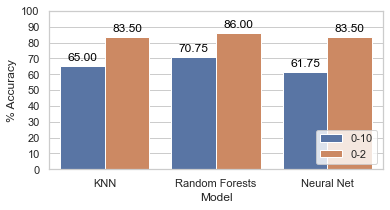

In [828]:

sns.set(style='whitegrid')
graph = sns.barplot(x='Model', y='Accuracy',hue='Status', data=res_red)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()),
     (p.get_x()+0.20, p.get_height()+2.0),
     ha='center', va='bottom',
     color= 'black')
# plt.title('Accuracy of Best Tested Classifiers For Red Wines ', fontsize=16)
plt.xlabel('Model')
plt.ylabel('% Accuracy')
plt.xticks(rotation = 0)
plt.yticks([int(x) for x in np.linspace(start = 0, stop = 100, num = 11)])
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(5.5, 2.82)

# plt.show()
plt.savefig('acc_red_compare.pdf')

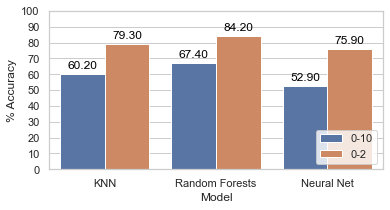

In [829]:
sns.set(style='whitegrid')
graph = sns.barplot(x='Model', y='Accuracy',hue='Status', data=res_white)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()),
     (p.get_x()+0.20, p.get_height()+2.0),
     ha='center', va='bottom',
     color= 'black')
# plt.title('Accuracy of Best Tested Classifiers For White Wines ', fontsize=16)
plt.xlabel('Model')
plt.ylabel('% Accuracy')
plt.xticks(rotation = 0)
plt.yticks([int(x) for x in np.linspace(start = 0, stop = 100, num = 11)])
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(5.5, 2.82)

# plt.show()
plt.savefig('acc_white_compare.pdf')

In [748]:
count = 0
params = [0,1,2,3,4,5,6,7,8,9,10]
for L in range(0, len(params)+1):
    for s in itertools.combinations(params, L):
        if list(s):
            count = count + 1

print(f'Number of combos {count}')

Number of combos 2047
